In [14]:
import pickle
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from tqdm import tqdm
import seaborn as sns

In [2]:
data = []
for i in range(1,20):
    with open(f'Gameinfo_with_user_60000_to_70000_{i}.pickle','rb') as f:
        data+=pickle.load(f)

In [3]:
with open('Gameinfo_with_user_110000_to_110314.pickle','rb') as f:
        data+=pickle.load(f)

In [4]:
with open('Gameinfo_with_user_48336_to_48925.pickle','rb') as f:
        data+=pickle.load(f)

In [5]:
len(data)

1609

In [6]:
data

[{'gameId': 4705731004,
  'teamId': 100,
  'win': False,
  'participants': [['Shadow HH', 'Sett', 50, 2.67, 51, 2.52, 53],
   ['03 Arin', 'Ezreal', 48, 2.68, 44, 1.89, 56],
   ['올라프 고수', "Rek'Sai", 55, 4.16, 64, 2.8, 51],
   ['트위치김수당', 'Pyke', 52, 3.49, 49, 5.35, 51],
   ['DYN DnDn', 'Vladimir', 50, 2.35, 43, 2.16, 51]]},
 {'gameId': 4705731004,
  'teamId': 200,
  'win': True,
  'participants': [['짜 룽', 'Nidalee', 52, 3.57, 57, 2.5, 51],
   ['0S20', 'Leona', 51, 2.66, 49, 2.75, 54],
   ['유튜브 철이럼블', 'Rumble', 51, 2.65, 50, 3.05, 50],
   ['쉔글벙글', 'Shen', 51, 3.66, 60, 3.12, 50],
   ['Schwartz', "Kai'Sa", 48, 2.7, 43, 2.55, 49]]},
 {'gameId': 4694999305,
  'teamId': 200,
  'win': False,
  'participants': [['쟝 삐에르 마뉘엘', 'Galio', 59, 3.58, 50, 2.8, 51],
   ['Shadow Swamp', 'Graves', 54, 3.13, 59, 3.22, 52],
   ['Schwartz', 'Ezreal', 54, 2.66, 43, 2.55, 49],
   ['나는탑만가', 'Gangplank', 52, 3.99, 41, 3.66, 57],
   ['Mocha', 'Sett', 40, 2.32, 55, 3.05, 50]]},
 {'gameId': 4692469533,
  'teamId': 

In [7]:
df = pd.DataFrame(data[0]['participants'],columns=['summonerName','champ','chamW_R','chamKDA','recentW_R','recentKDA','totalW_R'])

In [8]:
df['win']=data[0]['win']
df = df.iloc[:,2:]

In [9]:
df = np.array(df).mean(axis=0)
df

array([51.0, 3.07, 50.2, 2.944, 52.4, 0.0], dtype=object)

In [10]:
for i in data[1:]:
    temp = pd.DataFrame(i['participants'],columns=['summonerName','champ','chamW_R','chamKDA','recentW_R','recentKDA','totalW_R'])
    temp['win'] = bool(i['win'])
    temp=temp.iloc[:,2:]
    temp = np.array(temp).mean(axis=0)
    df = np.vstack((df,temp))
    

In [11]:
df = pd.DataFrame(df,columns=['chamW_R','chamKDA','recentW_R','recentKDA','totalW_R','win'])

In [12]:
df

,chamW_R,chamKDA,recentW_R,recentKDA,totalW_R,win
0,51,3.07,50.2,2.944,52.4,0
1,50.6,3.048,51.8,2.794,50.8,1
2,51.8,3.136,49.6,3.056,51.8,0
3,51.8,2.428,46.6,2.618,52.2,0
4,57,2.9,46.4,1.954,54,0
...,...,...,...,...,...,...
1604,55.8,2.376,47.2,2.434,54.2,1
1605,59.4,2.94,49.6,2.444,54.6,0
1606,52.6,2.504,52.2,2.264,53,0
1607,52.2,2.216,49.6,2.194,52.8,1


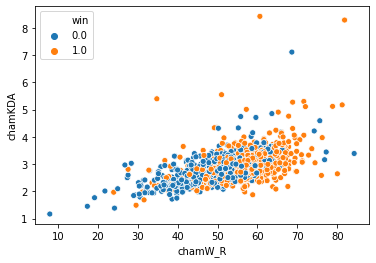

In [16]:
sns.scatterplot(x='chamW_R',
                y='chamKDA',
                hue="win",
               data=df)

In [36]:
df2

,chamW_R,chamKDA,recentW_R,recentKDA,totalW_R,win
0,0.564304,0.262404,0.666667,0.467492,0.500000,0.0
1,0.559055,0.259372,0.727273,0.428793,0.461165,1.0
2,0.574803,0.271499,0.643939,0.496388,0.485437,0.0
3,0.574803,0.173925,0.530303,0.383385,0.495146,0.0
4,0.643045,0.238975,0.522727,0.212074,0.538835,0.0
...,...,...,...,...,...,...
1604,0.627297,0.166759,0.553030,0.335913,0.543689,1.0
1605,0.674541,0.244487,0.643939,0.338493,0.553398,0.0
1606,0.585302,0.184399,0.742424,0.292054,0.514563,0.0
1607,0.580052,0.144708,0.643939,0.273994,0.509709,1.0


In [18]:
df.corr(method='spearman')

""


In [13]:
cor

""


In [38]:
df=df.iloc[:,2:]

In [26]:
scaler = MinMaxScaler()

In [27]:
scaler.fit(df)

MinMaxScaler()

In [28]:
df2 = pd.DataFrame(scaler.transform(df),columns=['chamW_R','chamKDA','recentW_R','recentKDA','totalW_R','win'])

In [29]:
df2

,chamW_R,chamKDA,recentW_R,recentKDA,totalW_R,win
0,0.564304,0.262404,0.666667,0.467492,0.500000,0.0
1,0.559055,0.259372,0.727273,0.428793,0.461165,1.0
2,0.574803,0.271499,0.643939,0.496388,0.485437,0.0
3,0.574803,0.173925,0.530303,0.383385,0.495146,0.0
4,0.643045,0.238975,0.522727,0.212074,0.538835,0.0
...,...,...,...,...,...,...
1604,0.627297,0.166759,0.553030,0.335913,0.543689,1.0
1605,0.674541,0.244487,0.643939,0.338493,0.553398,0.0
1606,0.585302,0.184399,0.742424,0.292054,0.514563,0.0
1607,0.580052,0.144708,0.643939,0.273994,0.509709,1.0


In [30]:
cor2=df2.corr()
cor2

,chamW_R,chamKDA,recentW_R,recentKDA,totalW_R,win
chamW_R,1.000000,0.534616,0.126920,0.149334,0.357452,0.363036
chamKDA,0.534616,1.000000,0.147927,0.363831,0.290998,0.183346
recentW_R,0.126920,0.147927,1.000000,0.436839,0.177591,0.015698
recentKDA,0.149334,0.363831,0.436839,1.000000,0.238271,0.069476
totalW_R,0.357452,0.290998,0.177591,0.238271,1.000000,0.122818
win,0.363036,0.183346,0.015698,0.069476,0.122818,1.000000


In [53]:
cor

,chamW_R,chamKDA,recentW_R,recentKDA,totalW_R,win
chamW_R,1.000000,0.479773,0.077386,0.092449,0.250065,0.189383
chamKDA,0.479773,1.000000,0.219957,0.350657,0.213003,0.083252
recentW_R,0.077386,0.219957,1.000000,0.505292,0.105894,0.006109
recentKDA,0.092449,0.350657,0.505292,1.000000,0.185709,0.030758
totalW_R,0.250065,0.213003,0.105894,0.185709,1.000000,0.062504
win,0.189383,0.083252,0.006109,0.030758,0.062504,1.000000


In [2]:
SVM = svm.SVC()
LR = LogisticRegression()

In [46]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1:]

In [59]:
X.isnull().sum()

chamW_R      0
chamKDA      0
recentW_R    0
recentKDA    0
totalW_R     0
dtype: int64

,win
0,0
1,1
2,0
3,0
4,0
...,...
1604,1
1605,0
1606,0
1607,1


In [64]:
SVM.fit(X,y)
LR.fit(X,y)

C:\Users\DongwonLee\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\DongwonLee\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [65]:
SVM.score(X,y)

0.6544437538844002

In [69]:
LR.score(X,y)

0.6507147296457427

In [28]:
tsne = TSNE(n_components=1,learning_rate=100.0)

In [47]:
tsne_results = tsne.fit_transform(X)

In [51]:
#pd.DataFrame(tsne_results).to_csv('User_tsne.csv')

In [159]:
user_data = pd.DataFrame(data[0]['participants'],columns=['summonerName','Champion','chamW_R','chamKDA','recentW_R','recentKDA','totalW_R']).iloc[:,:-5]
user_data['win']=data[0]['win']
user_data['teamId']=data[0]['teamId']
user_data['winrate']=0.0
user_data['AFK rate']=0.0
            

In [160]:
user_data

,summonerName,Champion,win,teamId,winrate,AFK rate
0,Shadow HH,Sett,False,100,0.0,0.0
1,03 Arin,Ezreal,False,100,0.0,0.0
2,올라프 고수,Rek'Sai,False,100,0.0,0.0
3,트위치김수당,Pyke,False,100,0.0,0.0
4,DYN DnDn,Vladimir,False,100,0.0,0.0


In [161]:
for i in range(5):
    for j in range(len(champ_wr)):
        if user_data.loc[:,'Champion'][i] == champ_wr.loc[:,'Champion'][j]:
            user_data.loc[:,'AFK rate'][i]=champ_wr.loc[:,'AFK rate'][j]
            if  user_data.loc[:,'teamId'][i]==100.0:
                user_data.loc[:,'winrate'][i]=champ_wr.loc[:,'Blue W_R'][j]
            else :
                user_data.loc[:,'winrate']=champ_wr.loc[:,'Red W_R'][j]

<ipython-input-161-2959e0606eb0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_data.loc[:,'AFK rate'][i]=champ_wr.loc[:,'AFK rate'][j]
<ipython-input-161-2959e0606eb0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_data.loc[:,'winrate'][i]=champ_wr.loc[:,'Blue W_R'][j]


In [162]:
user_data=user_data.iloc[:,2:]
user_data

,win,teamId,winrate,AFK rate
0,False,100,0.4208,0.007114
1,False,100,0.4690,0.004607
2,False,100,0.4938,0.005392
3,False,100,0.4686,0.006066
4,False,100,0.4876,0.006689


In [163]:
user_data = np.array(user_data).mean(axis=0)

In [164]:
for i in tqdm(data[1:]):
    temp = pd.DataFrame(i['participants'],columns=['summonerName','Champion','chamW_R','chamKDA','recentW_R','recentKDA','totalW_R']).iloc[:,:-5]
    temp['win']=i['win']
    temp['teamId']=float(i['teamId'])
    temp['winrate']=0.0
    temp['AFK rate']=0.0
    for j in range(5):
        for k in range(len(champ_wr)):
            if temp.loc[:,'Champion'][j] == champ_wr.loc[:,'Champion'][k]:
                temp.loc[:,'AFK rate'][j]=champ_wr.loc[:,'AFK rate'][k]
                if  temp.loc[:,'teamId'][j]==100.0:
                    temp.loc[:,'winrate'][j]=champ_wr.loc[:,'Blue W_R'][k]
                else :
                    temp.loc[:,'winrate'][j]=champ_wr.loc[:,'Red W_R'][k]
    temp=temp.iloc[:,2:]
    temp = np.array(temp).mean(axis=0)
    user_data = np.vstack((user_data,temp))

  0%|                                                                                         | 0/1608 [00:00<?, ?it/s]<ipython-input-164-2a7f5b8260ef>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[:,'AFK rate'][j]=champ_wr.loc[:,'AFK rate'][k]
<ipython-input-164-2a7f5b8260ef>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[:,'winrate'][j]=champ_wr.loc[:,'Red W_R'][k]
  0%|▏                                                                                | 4/1608 [00:00<01:40, 16.04it/s]<ipython-input-164-2a7f5b8260ef>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [165]:
user_df=pd.DataFrame(user_data,columns=['win','teamId','win rate','AFK rate'])


In [166]:
user_df

,win,teamId,win rate,AFK rate
0,0,100,0.46796,0.00597369
1,1,200,0.51354,0.00492914
2,0,200,0.51058,0.00567301
3,0,200,0.51818,0.00517882
4,0,200,0.48538,0.005505
...,...,...,...,...
1604,1,200,0.4972,0.00623269
1605,0,100,0.47784,0.00640464
1606,0,200,0.49868,0.00588855
1607,1,100,0.46538,0.00612824


In [167]:
user_df.to_csv('User_data.csv')

In [168]:
user_df.corr()

""


In [157]:
champ_wr = pd.read_csv('../Web_crawling/Champion_WR.csv').iloc[:,1:]

In [158]:
champ_wr['Champion']

0           Corki
1        Cho'Gath
2         Trundle
3         Taliyah
4      Tahm Kench
          ...    
147       Vel'Koz
148         Akali
149         Sivir
150          Kayn
151        Soraka
Name: Champion, Length: 152, dtype: object

In [18]:
file =open('../LOL 자료/Gameinfo_with_user_60000_to_70000_1.pickle','rb')
a= pickle.load(file)
a

[]